# Clustering metrics - alternatives to the _elbow method_
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

Clustering is an important part of the machine learning pipeline for business or scientific enterprises utilizing data science. As the name suggests, it helps to identify congregations of closely related (by some measure of distance) data points in a blob of data, which, otherwise, would be difficult to make sense of.

A popular method like k-means clustering does not seem to provide a completely satisfactory answer when we ask the basic question: 
> **"How would we know the actual number of clusters, to begin with?"**

This question is critically important because of the fact that the process of clustering is often a precursor to further processing of the individual cluster data and therefore, the amount of computational resource may depend on this measurement. 

In the case of a business analytics problem, repercussion could be worse. Clustering is often done for such analytics with the goal of market segmentation. It is, therefore, easily conceivable that, depending on the number of clusters, appropriate marketing personnel will be allocated to the problem. Consequently, a wrong assessment of the number of clusters can lead to sub-optimum allocation of precious resources.

For the k-means clustering method, the most common approach for answering this question is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

In this notebook, we show what metric to use for visualizing and determining an optimal number of clusters much better than the usual practice - elbow method.

---

In [7]:
# Numpy and Pandas
import numpy as np
import pandas as pd
# Visualization Libs
import matplotlib.pyplot as plt
import seaborn as sns

//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Create synthetic data using Scikit learn `make_blob` method

- Number of features: 4
- Number of clusters: 5
- Number of samples: 200

In [1]:
# Creates clusters of points
from sklearn.datasets import make_classification
# Creates synthetic data
# Generate isotropic Gaussian blobs for clustering.
from sklearn.datasets import make_blobs

In [3]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [4]:
data1 = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_cluster,
    cluster_std=cluster_std
)

In [15]:
d1.shape

(200, 4)

In [5]:
d1 = data1[0]

In [8]:
df1 = pd.DataFrame(
    data=d1,
    columns=['Feature_'+str(i) for i in range(1,n_features+1)]
)
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-8.368853,3.394014,-0.260804,-1.007947
1,7.297356,2.390383,4.249769,-3.501799
2,-6.667713,-0.513255,-0.611013,-4.264041
3,-5.820388,0.445104,-2.278267,-5.145507
4,9.627602,4.584509,0.051158,-8.192767


In [9]:
from itertools import combinations

In [11]:
lst_vars = list(combinations(df1.columns, 2))

In [16]:
lst_vars

[('Feature_1', 'Feature_2'),
 ('Feature_1', 'Feature_3'),
 ('Feature_1', 'Feature_4'),
 ('Feature_2', 'Feature_3'),
 ('Feature_2', 'Feature_4'),
 ('Feature_3', 'Feature_4')]

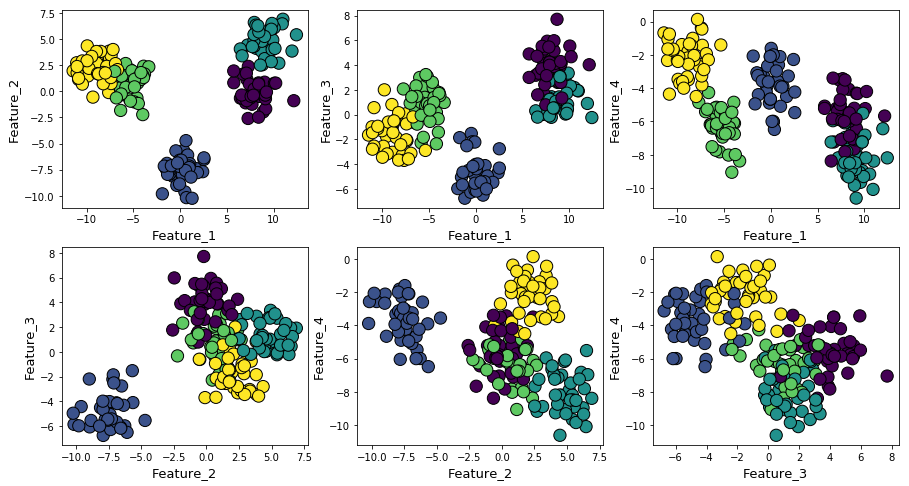

In [17]:
plt.figure(figsize=(15, 8))
for i in range(1, 7):
    plt.subplot(2, 3, i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(
        df1[dim1],
        df1[dim2],
        c=data1[1],
        edgecolor='k',
        s=150
    )
    plt.xlabel(f"{dim1}", fontsize=13)
    plt.ylabel(f"{dim2}", fontsize=13)

### How are the classes separated (boxplots)

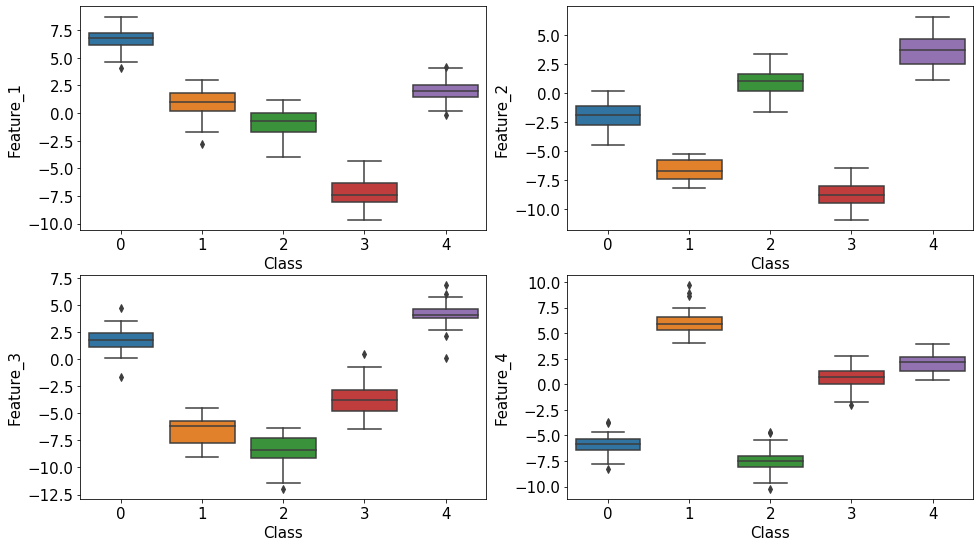

In [11]:
plt.figure(figsize=(16, 14))
for i, c in enumerate(df1.columns):
    plt.subplot(3, 2, i+1)
    sns.boxplot(y=df1[c], x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class", fontsize=15)
    plt.ylabel(c, fontsize=15)
    #plt.show()

## k-means clustering

In [33]:
from sklearn.cluster import KMeans

//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Unlabled data

In [25]:
X=df1

In [26]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-8.368853,3.394014,-0.260804,-1.007947
1,7.297356,2.390383,4.249769,-3.501799
2,-6.667713,-0.513255,-0.611013,-4.264041
3,-5.820388,0.445104,-2.278267,-5.145507
4,9.627602,4.584509,0.051158,-8.192767


In [27]:
y=data1[1]

### Scaling

In [28]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
# Scales data to a specified range (default, (0, 1))
scaler = MinMaxScaler()

In [30]:
X_scaled = scaler.fit_transform(X)

### Metrics

In [31]:
# Import metrics to evaluate clustering models
from sklearn.metrics import silhouette_score, davies_bouldin_score, v_measure_score

//anaconda3/envs/nf/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### Running k-means and computing inter-cluster distance score for various *k* values

In [35]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    # KMeans score is the opposite of the objective of the algorithm,
    # where the objective is the sum of the distances between data points 
    # and their respective data centers (cluster centers)
    print(f'Score for number of cluster(s) {i}: {km.score(X_scaled)}')
    km_scores.append(-km.score(X_scaled))
    
    
    silhouette = silhouette_score(X_scaled, preds)
    km_silhouette.append(silhouette)
    print(f'Silhouette score for number of cluster(s) {i}: {silhouette}')
    
    db = davies_bouldin_score(X_scaled, preds)
    db_score.append(db)
    print(f'Davies Bouldin score for number of cluster(s) {i}: {db}')
    
    v_measure = v_measure_score(y, preds)
    vmeasure_score.append(v_measure)
    print(f'V-measure score for number of cluster(s) {i}: {v_measure}')
    print('-'*100)

Score for number of cluster(s) 2: -25.229755995268242
Silhouette score for number of cluster(s) 2: 0.46655783212844704
Davies Bouldin score for number of cluster(s) 2: 0.8951689103004611
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -12.972843615385687
Silhouette score for number of cluster(s) 3: 0.5637017596286913
Davies Bouldin score for number of cluster(s) 3: 0.6829726225112119
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -8.933872189515435
Silhouette score for number of cluster(s) 4: 0.5434469112278849
Davies Bouldin score for number of cluster(s) 4: 0.6158300197129434
V-measure score for number of cluster(s) 4: 0.905746099275519
----------------------------------------------------

# TODO: Look up Silhoute, Davies Bouldien and V-measure score!

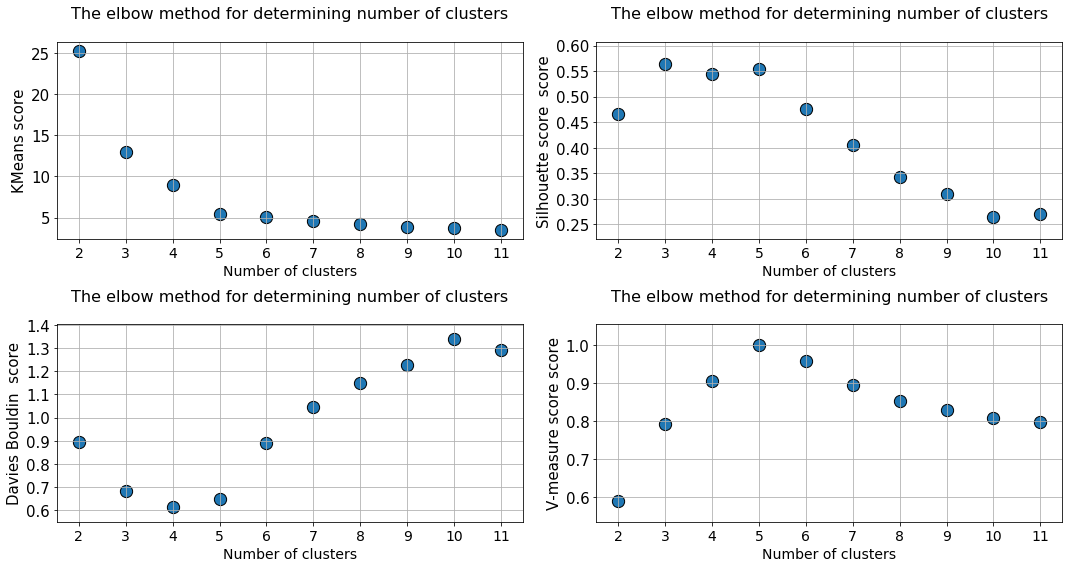

In [51]:
# Plot the resulting score against # of cluster, look for "the elbow"
plt.figure(figsize=(15, 8))
m_list = [
    (km_scores, 'KMeans'),
    (km_silhouette, 'Silhouette score '),
    (db_score, 'Davies Bouldin '),
    (vmeasure_score, 'V-measure score')
]
i = 1
for m in m_list:
    plt.subplot(2, 2, i)
    plt.title(f'The elbow method for determining number of clusters\n', fontsize=16)
    plt.scatter(x=[i for i in range(2, 12)], y=m[0], s=150, edgecolor='k')
    plt.grid(True)
    plt.xlabel('Number of clusters', fontsize=14)
    plt.ylabel(f'{m[1]} score', fontsize=15)
    plt.xticks([i for i in range(2, 12)], fontsize=14)
    plt.yticks(fontsize=15)
    i += 1
    plt.tight_layout()
    #plt.show()


## Expectation-maximization (Gaussian Mixture Model)

In [55]:
from sklearn.mixture import GaussianMixture

In [59]:
gm_bic= []
gm_score=[]
for i in range(2, 12):
    gm = GaussianMixture(
        n_components=i,
        n_init=10,
        tol=1E-3,
        max_iter=1000
    )
    gm.fit(X_scaled)
    print(f'BIC for number of cluster(s) {i}: {gm.bic(X_scaled)}')
    print(f'Log-likelihood score for number of cluster(s) {i}: {gm.score(X_scaled)}')
    print('-'*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -702.8363588338855
Log-likelihood score for number of cluster(s) 2: 2.1412189061594464
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -890.0608127575765
Log-likelihood score for number of cluster(s) 3: 2.8079669422142253
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -880.0096270720908
Log-likelihood score for number of cluster(s) 4: 2.981525879246062
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -863.3335255459133
Log-likelihood score for number of cluster(s) 5: 3.13852252667617
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -800.776182947289
Log-likelihood score for number of cluster(s) 6: 3.180816071425161
------

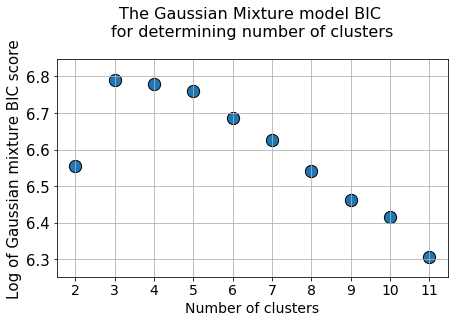

In [62]:
plt.figure(figsize=(7, 4))
plt.title(
    'The Gaussian Mixture model BIC \nfor determining number of clusters\n',
    fontsize=16
)
plt.scatter(
    x=[i for i in range(2, 12)],
    y=np.log(gm_bic),
    s=150,
    edgecolor='k'
)
plt.grid(True)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('Log of Gaussian mixture BIC score',fontsize=15)
plt.xticks([i for i in range(2, 12)], fontsize=14)
plt.yticks(fontsize=15)
plt.show()

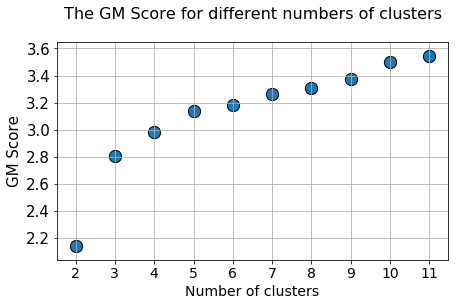

In [66]:
plt.figure(figsize=(7, 4))
plt.title(
    'The GM Score for different numbers of clusters\n',
    fontsize=16
)
plt.scatter(
    x=[i for i in range(2, 12)],
    y=gm_score,
    s=150,
    edgecolor='k'
)
plt.grid(True)
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('GM Score', fontsize=15)
plt.xticks([i for i in range(2, 12)], fontsize=14)
plt.yticks(fontsize=15)
plt.show()